## start point

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('assets/cars2025.csv', encoding='latin-1')

In [35]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [36]:
df.shape

(1217, 11)

In [37]:
df.isna().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [38]:
df.dropna(inplace=True)

## Preprocessing

In [39]:
import re


def remove_chars(val, chars):
    if not chars:
        return val
    for r in chars:
        val = val.replace(r, '')
    return val

def clean_interval(interval, range_regex, replaces=None):
    match = re.search(range_regex, interval)
    if match:
        x = remove_chars(match.group(1), replaces)
        y = remove_chars(match.group(2), replaces)
        return (float(x) + float(y)) / 2
    return None


def clean_single(val, regex, replaces=None):
    match = re.search(regex, val)
    if match:
        x = remove_chars(match.group(1), replaces)
        return float(x)
    else:
        return None

In [40]:
def clean_hp(v):
    interval = clean_interval(v, r"(\d+)\D+(\d+)")
    if interval:
        return interval
    else:
        single = clean_single(v, r"(\d+)")
        return single if single else None


def clean_performance(v):
    interval = clean_interval(v, r'(\d+\.\d+)\s.*?\s(\d+\.\d+)')
    if interval:
        return interval
    else:
        single = clean_single(v, r"(\d+\.?\d*)")
        return single if single else None
        

def clean_price(v):
    interval = clean_interval(v, r'(\$\d{1,3}(?:,\d{3})*)\s*-\s*(\$\d{1,3}(?:,\d{3})*)', '$,.')
    if interval:
        return interval
    else:
        single = clean_single(v, r"(\$\d{1,3}(?:,\d{3})*)", '$,.')
        return single if single else None
    

def clean_cc(v):
    v = v.replace('cc', '').replace(',', '').strip()
    try:
        return float(v)
    except:
        return None


In [41]:
df['HorsePower'] = df['HorsePower'].apply(clean_hp)
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(clean_performance)
df['Torque'] = df['Torque'].apply(clean_hp)
df['Total Speed'] = df['Total Speed'].apply(clean_hp)
df['Cars Prices'] = df['Cars Prices'].apply(clean_price)
#df['CC/Battery Capacity'] = df['CC/Battery Capacity'].apply(clean_cc)

In [42]:
df['Company Names'] = df['Company Names'].apply(lambda x: x.lower().strip())
df = df[df['Company Names'] != 'bugatti']
df = df[df['Company Names'] != 'tesla']
df = df[df['Company Names'] != 'volvo']
df = df.dropna()

In [43]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,ferrari,SF90 STRADALE,V8,3990 cc,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,rolls royce,PHANTOM,V12,6749 cc,563.0,250.0,5.3,460000.0,Petrol,5,900.0
2,ford,KA+,1.2L Petrol,"1,200 cc",77.5,165.0,10.5,13500.0,Petrol,5,120.0
3,mercedes,GT 63 S,V8,"3,982 cc",630.0,250.0,3.2,161000.0,Petrol,4,900.0
4,audi,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.6,253290.0,Petrol,2,560.0


In [44]:
df.describe()

,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Torque
count,1177.000000,1177.000000,1177.000000,1.177000e+03,1177.000000
mean,288.899745,215.483432,7.578675,9.051358e+04,404.518267
std,172.956814,48.373159,3.177930,2.769134e+05,211.338069
min,0.500000,85.000000,2.500000,4.000000e+03,25.500000
25%,150.000000,180.000000,5.400000,2.800000e+04,250.000000
50%,250.000000,200.000000,7.200000,4.200000e+04,362.000000
75%,389.000000,250.000000,9.500000,6.900000e+04,528.000000
max,1160.000000,402.000000,35.000000,6.000000e+06,1234.000000


In [45]:
df.shape

(1177, 11)

## Segmentation

In [46]:
def company_category(mean):
    quantiles = df.groupby('Company Names')['Cars Prices'].mean().sort_values(ascending=False).quantile([0.25, 0.5, 0.75])
    if mean <= quantiles[0.25]:
        return 'economics'
    elif mean <= quantiles[0.5]:
        return 'popular'
    elif mean <= quantiles[0.75]:
        return 'premium'
    else:
        return 'luxe'

In [47]:
df['category'] = df.groupby('Company Names')['Cars Prices'].transform(lambda x: company_category(x.mean()))

In [48]:
import numpy as np
from scipy import stats

def ci(media, std, n, confianca=0.95):
    alpha = 1 - confianca
    t_critico = stats.t.ppf(1 - alpha/2, df=n-1)  # t-critico para intervalo de confiança
    erro = t_critico * (std / np.sqrt(n))  # erro padrão
    return media - erro, media + erro  # intervalo de confiança


grouped = df.groupby('Company Names')['Cars Prices'].agg(['mean', 'std', 'count'])
grouped[['ic_lower', 'ic_upper']] = grouped.apply(
    lambda row: ci(row['mean'], row['std'], row['count']),
    axis=1,
    result_type="expand"
)
df = df.merge(grouped[['ic_lower', 'ic_upper']], on='Company Names', how='left')

mean_df = df.groupby('Company Names')['Cars Prices'].mean().reset_index()
df = df.merge(mean_df, on='Company Names', how='left', suffixes=('', '_mean'))

In [49]:
df['IC_Amplitude'] = df['ic_upper'] - df['ic_lower']
df['IC_Relativo_Percentual'] = (df['IC_Amplitude'] / df['Cars Prices_mean']) * 100

Q1 = df['IC_Relativo_Percentual'].quantile(0.25)
Q3 = df['IC_Relativo_Percentual'].quantile(0.75)

def classificar_ic(ic_relativo):
    if ic_relativo <= Q1:
        return 1
    elif ic_relativo > Q3:
        return 3
    else:
        return 2

df['diversity'] = df['IC_Relativo_Percentual'].apply(classificar_ic)

In [50]:
df.drop(labels=['ic_lower', 'ic_upper', 'IC_Amplitude', 'IC_Relativo_Percentual', 'Cars Prices_mean'], axis=1, inplace=True)

In [51]:
df

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque,category,diversity
0,ferrari,SF90 STRADALE,V8,3990 cc,963.0,340.0,2.50,1100000.0,plug in hyrbrid,2,800.0,luxe,3
1,rolls royce,PHANTOM,V12,6749 cc,563.0,250.0,5.30,460000.0,Petrol,5,900.0,luxe,1
2,ford,KA+,1.2L Petrol,"1,200 cc",77.5,165.0,10.50,13500.0,Petrol,5,120.0,popular,2
3,mercedes,GT 63 S,V8,"3,982 cc",630.0,250.0,3.20,161000.0,Petrol,4,900.0,luxe,2
4,audi,AUDI R8 Gt,V10,"5,204 cc",602.0,320.0,3.60,253290.0,Petrol,2,560.0,premium,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240.0,180.0,7.60,43590.0,Hybrid (Gas + Electric),5,239.0,popular,2
1173,toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326.0,180.0,6.80,50000.0,Hybrid,7,630.0,popular,2
1174,toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,182.5,190.0,8.60,25210.0,Gas / Hybrid,5,200.0,popular,2
1175,toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,169.0,180.0,9.20,33000.0,Hybrid,5,197.5,popular,2


## Exploration

<Axes: >

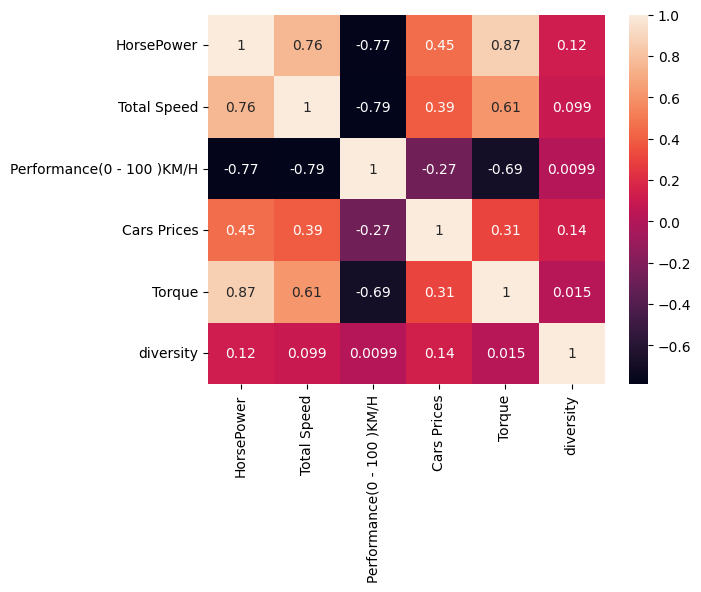

In [69]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True)

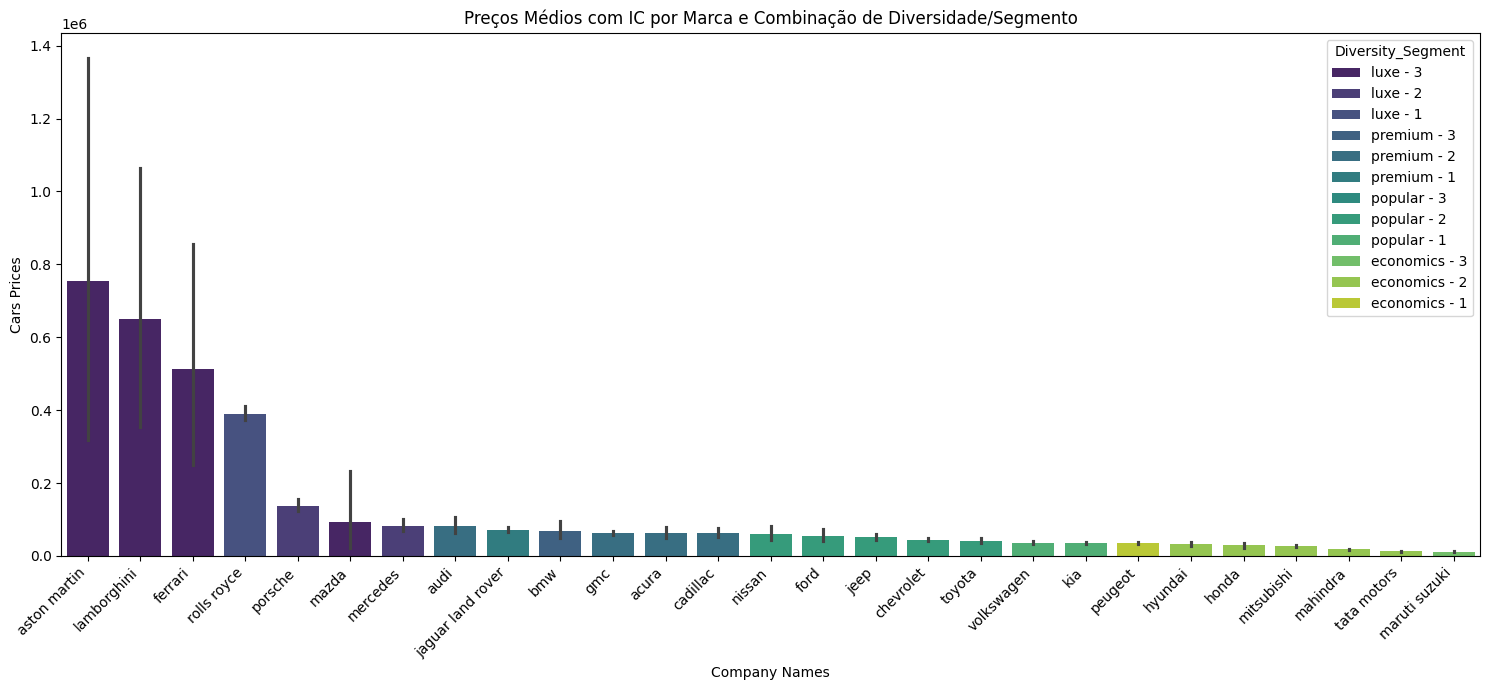

In [52]:
df['Diversity_Segment'] = df['category'] + ' - ' + df['diversity'].astype(str)

order_combined = df.groupby('Company Names')['Cars Prices'].mean().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(15, 7))
sns.barplot(
    x='Company Names', 
    y='Cars Prices',   
    data=df,
    errorbar=('ci', 95),     
    hue='Diversity_Segment', 
    hue_order=['luxe - 3', 'luxe - 2', 'luxe - 1','premium - 3', 'premium - 2', 'premium - 1','popular - 3', 'popular - 2', 'popular - 1','economics - 3', 'economics - 2', 'economics - 1'],
    order=order_combined,
    palette='viridis'
)

plt.xticks(rotation=45, ha='right')
plt.title('Preços Médios com IC por Marca e Combinação de Diversidade/Segmento')
plt.tight_layout()
plt.show()

In [73]:
df.groupby('category')['diversity'].agg(['mean', 'sum']).sort_values(by=['mean'], ascending=False)

,mean,sum
category,,
luxe,2.362319,652
premium,2.004808,417
economics,1.708571,299
popular,1.652510,856


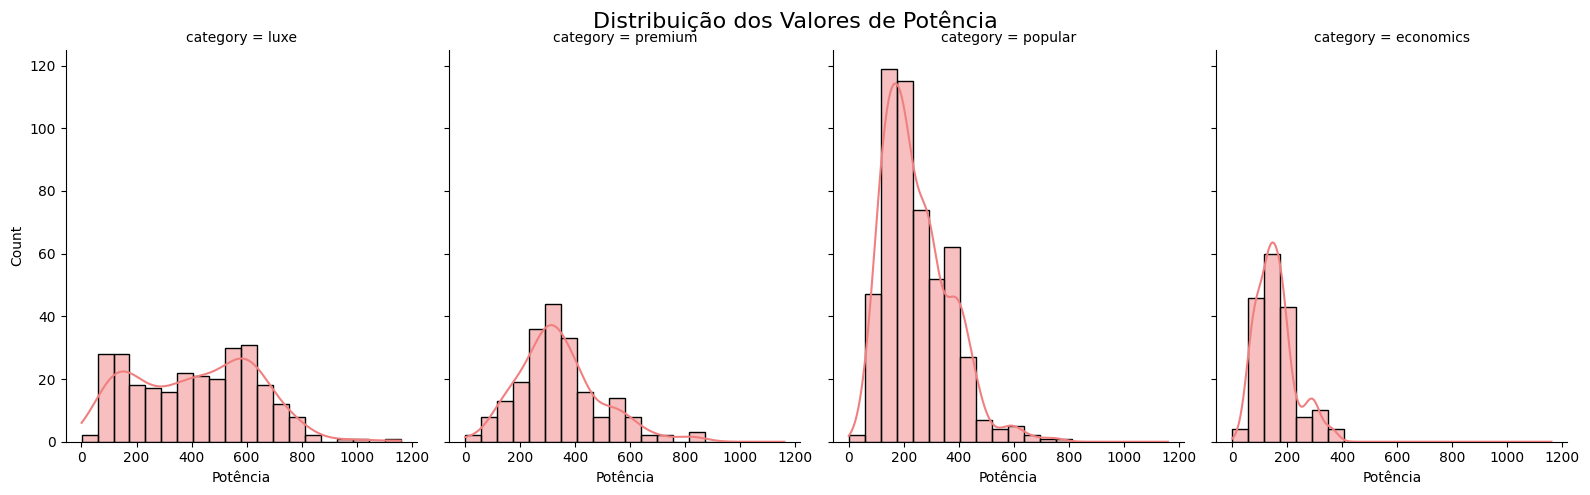

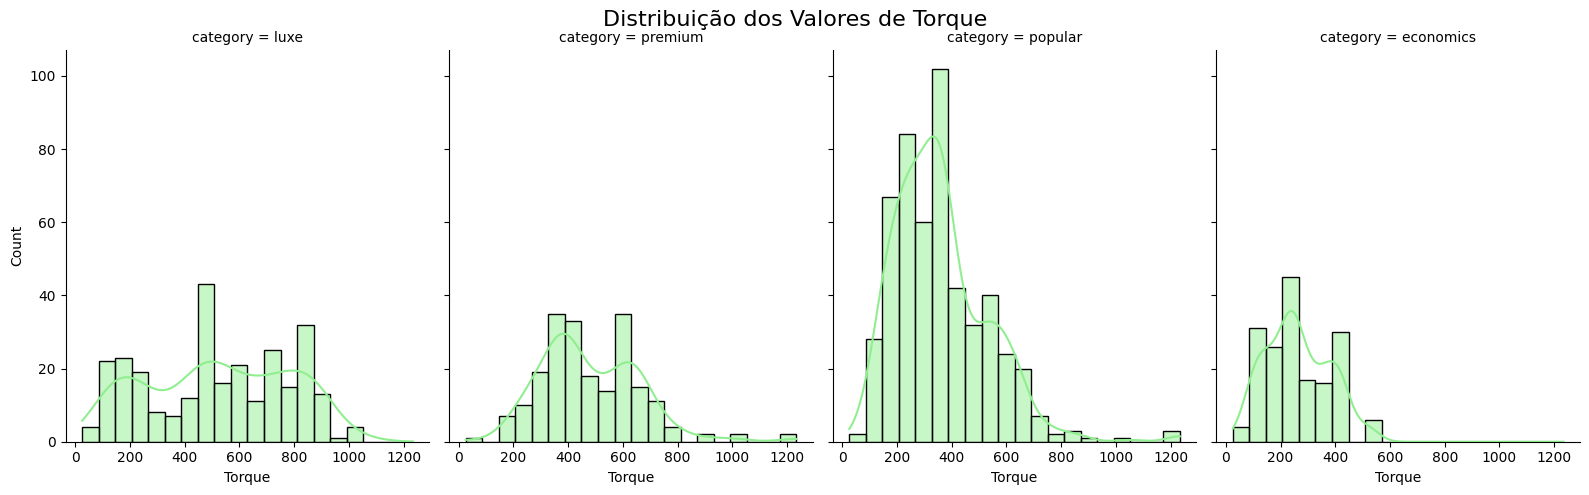

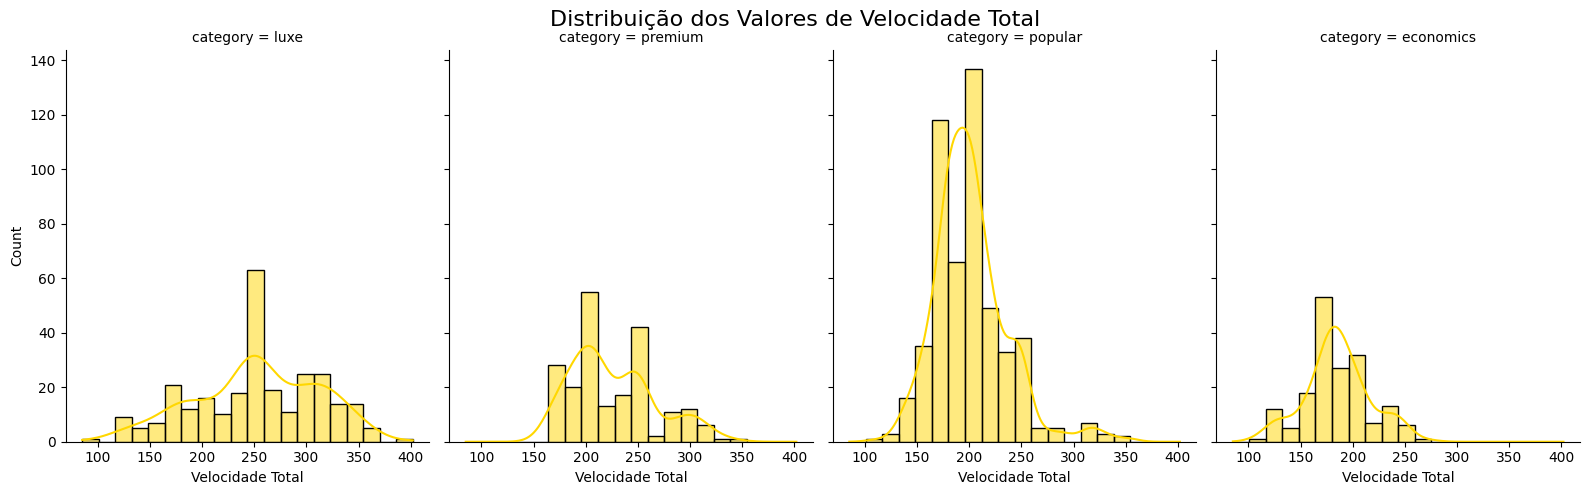

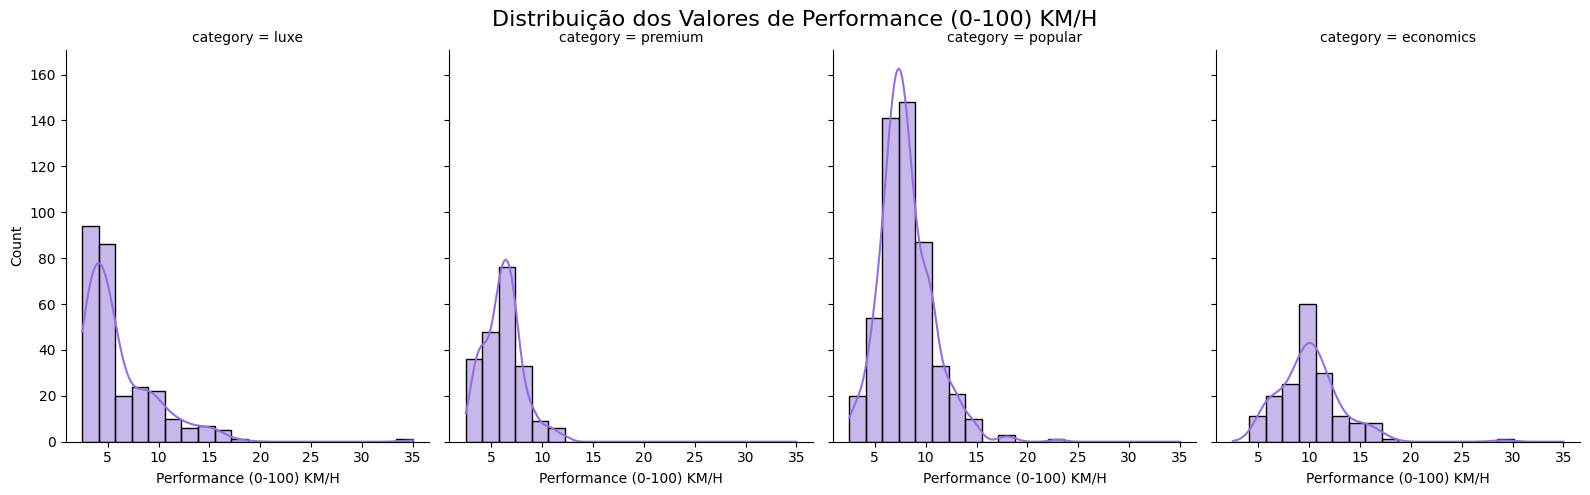

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

METRICAS = {
    'HorsePower': {'titulo': 'Potência', 'cor': 'lightcoral'},
    'Torque': {'titulo': 'Torque', 'cor': 'lightgreen'},
    'Total Speed': {'titulo': 'Velocidade Total', 'cor': 'gold'},
    'Performance(0 - 100 )KM/H': {'titulo': 'Performance (0-100) KM/H', 'cor': 'mediumpurple'},
}

COLUNA_SEGMENTO = 'category'
ORDEM_SEGMENTO = ['luxe', 'premium', 'popular', 'economics']

for metrica, config in METRICAS.items():
    g = sns.displot(
        data=df,
        x=metrica,
        col=COLUNA_SEGMENTO,       
        col_order=ORDEM_SEGMENTO,   
        kind='hist',                 
        color=config['cor'],
        bins=20,                     
        kde=True,                    
        height=5,
        aspect=0.8,
    )
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(
        f'Distribuição dos Valores de {config["titulo"]}',
        fontsize=16
    )

    for ax in g.axes.flat:
        ax.set_xlabel(config['titulo'])
        ax.ticklabel_format(style='plain', axis='x', useOffset=False)

plt.show()

In [74]:
df['diversity'].groupby(df['category']).mean().sort_values(ascending=False)

category
luxe         2.362319
premium      2.004808
economics    1.708571
popular      1.652510
Name: diversity, dtype: float64

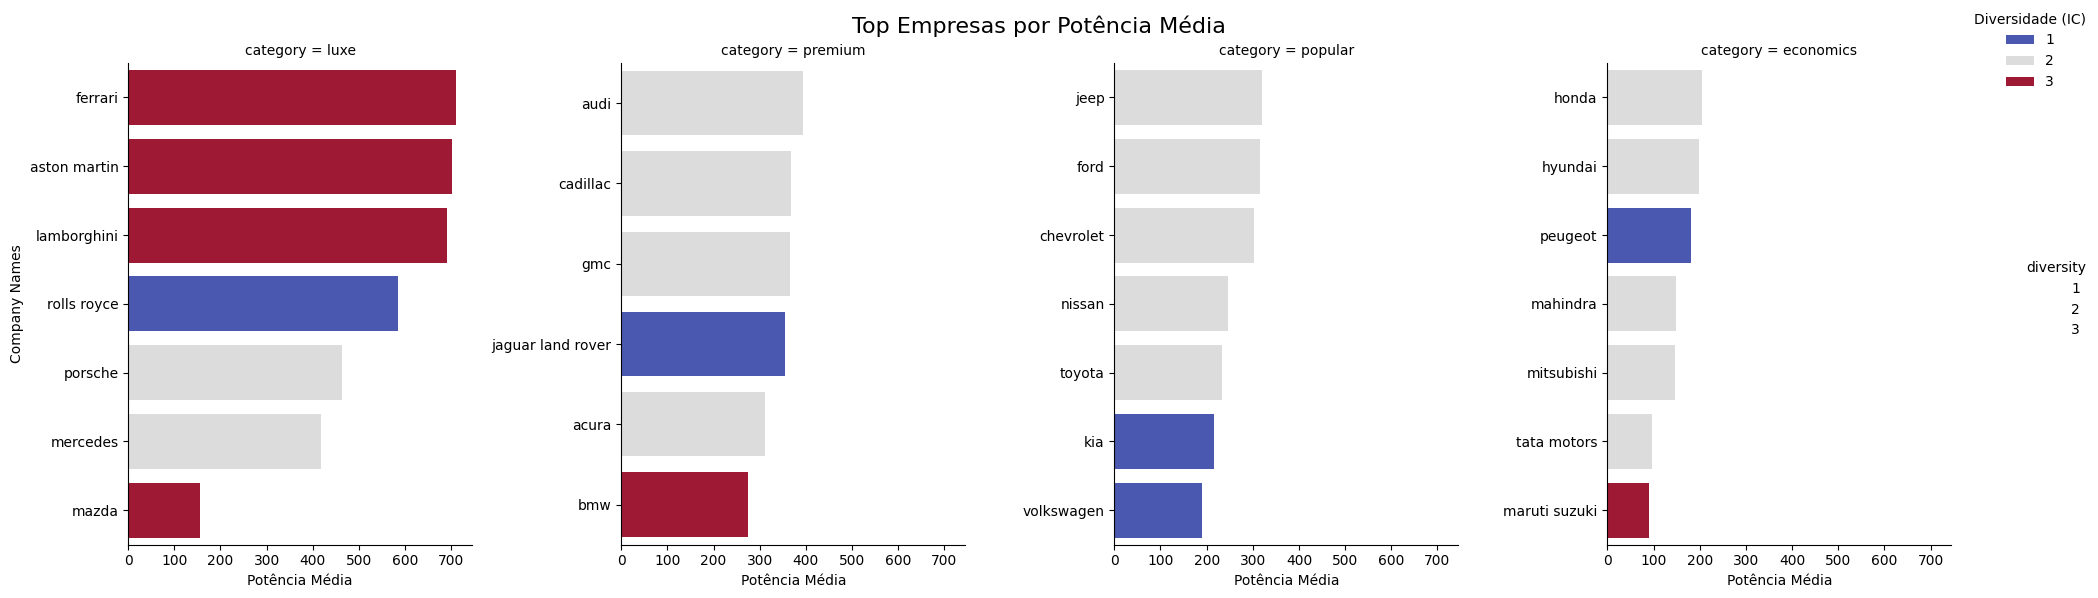

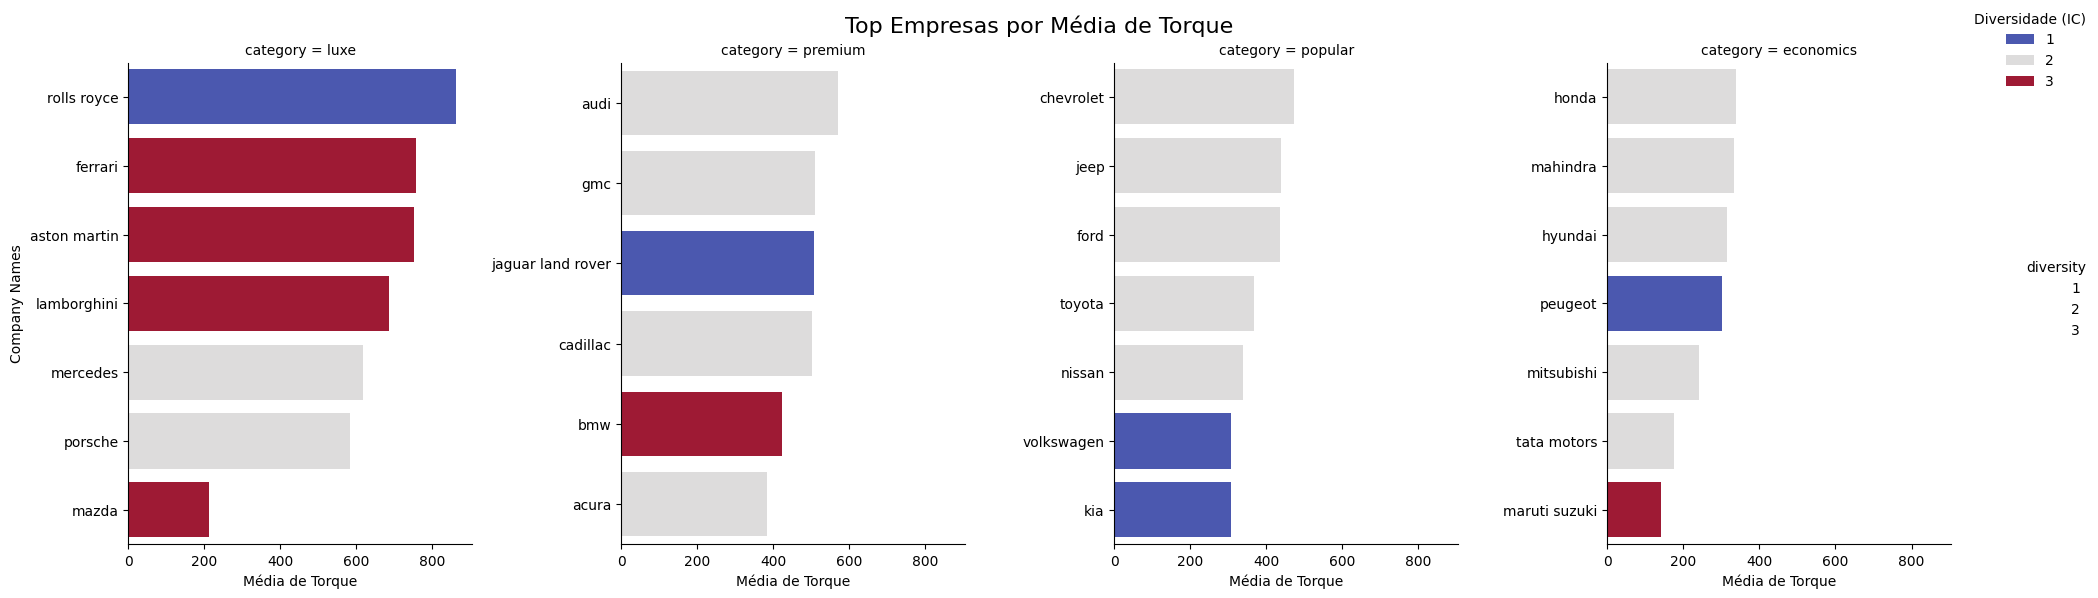

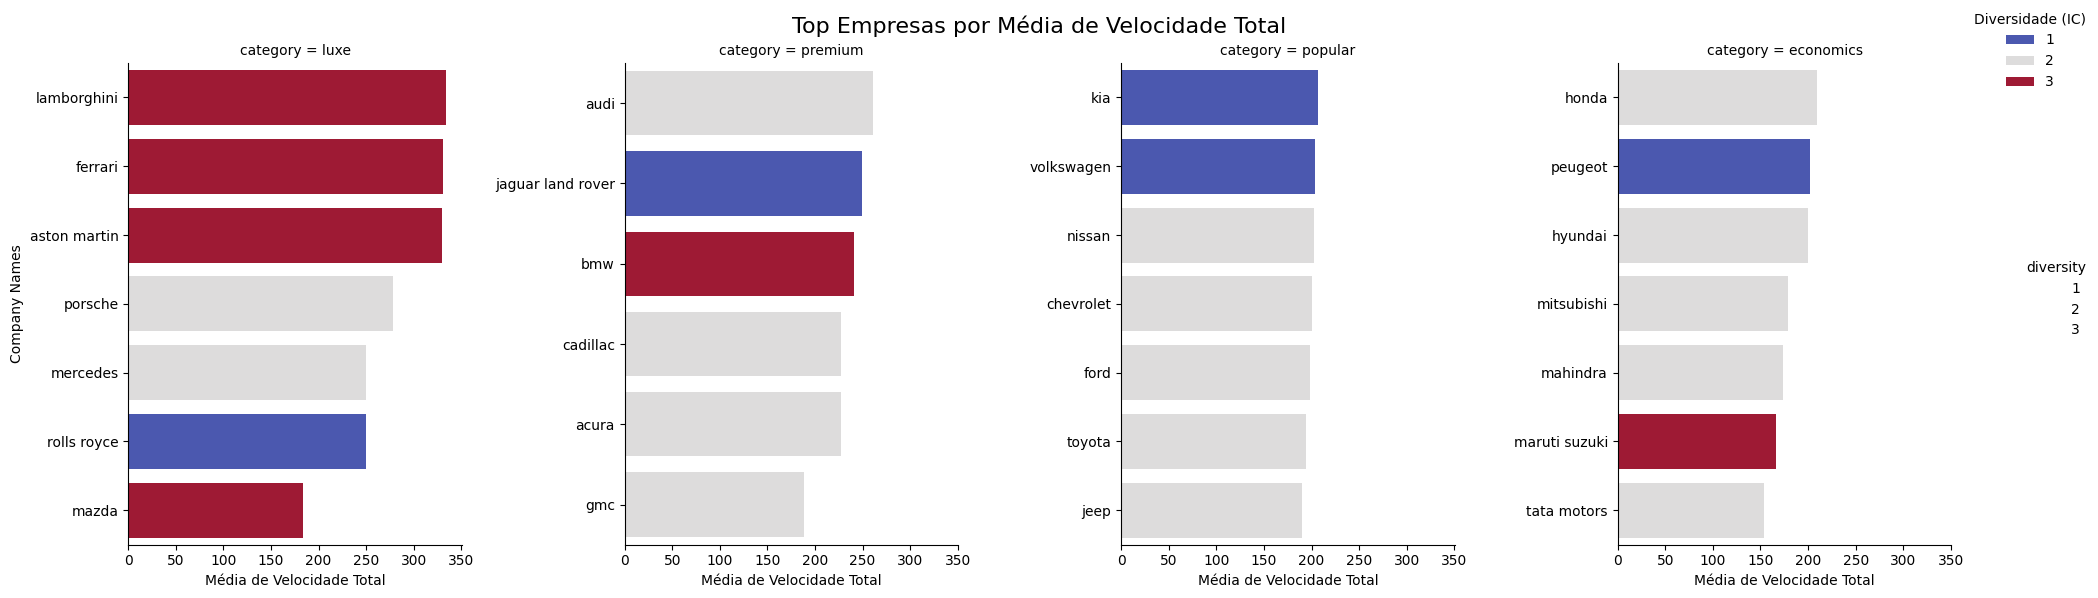

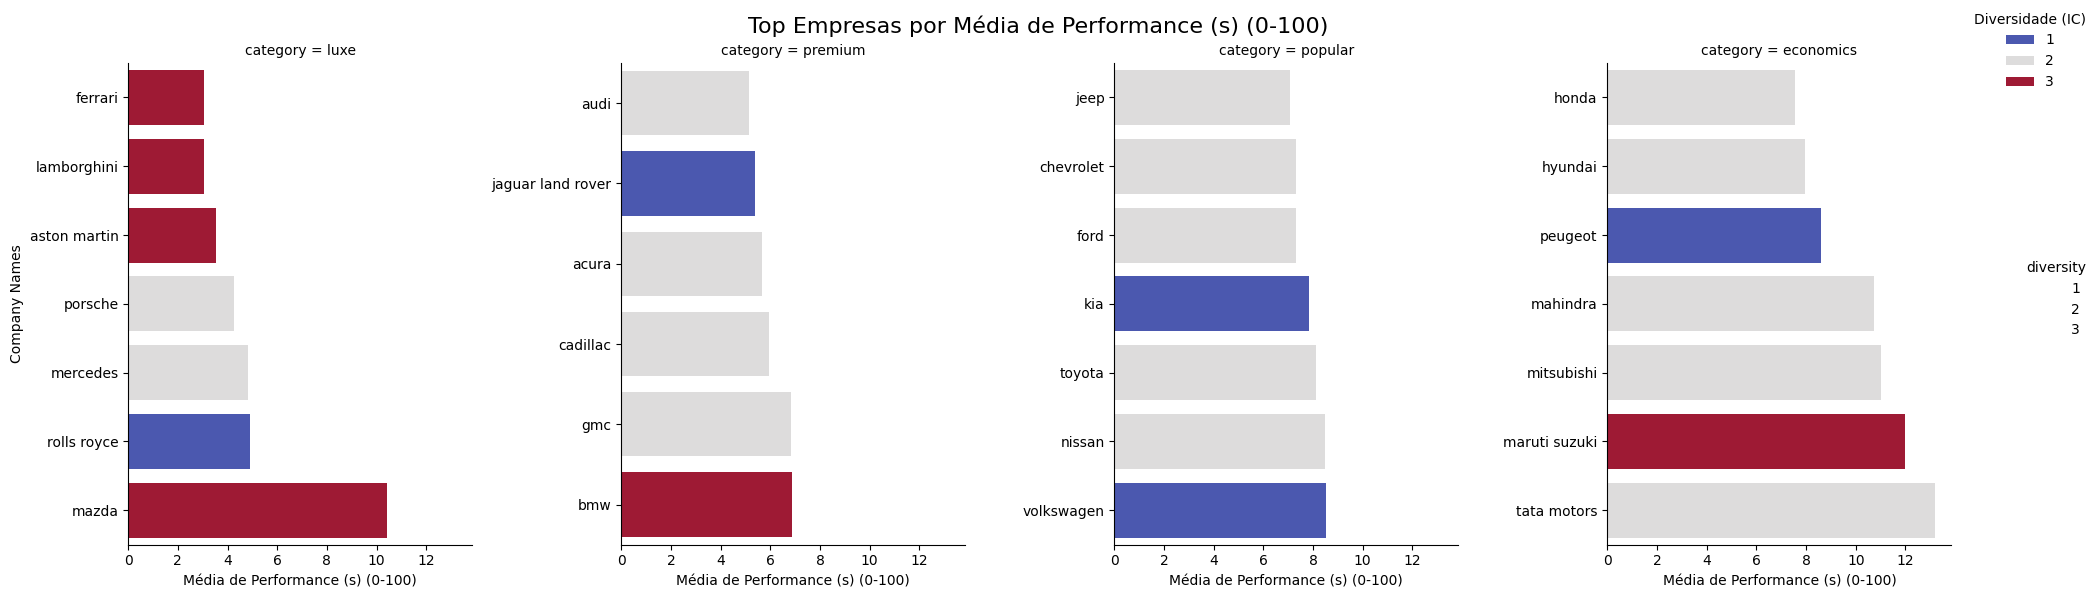

In [55]:
METRICAS = {
    'HorsePower': {'titulo': 'Potência Média', 'asc': False},
    'Torque': {'titulo': 'Média de Torque', 'asc': False},
    'Total Speed': {'titulo': 'Média de Velocidade Total', 'asc': False},
    'Performance(0 - 100 )KM/H': {'titulo': 'Média de Performance (s) (0-100)', 'asc': True},
}

COLUNA_SEGMENTO = 'category'
ORDEM_SEGMENTO = ['luxe', 'premium', 'popular', 'economics']
ORDEM_DIVERSIDADE = [1, 2, 3] 


def get_top_n_by_segment(df, metrica, n=10, ascending=False):
    """
    Filtra o DataFrame para obter o Top N de Company Names por métrica,
    agrupando também pela 'diversity' para que o hue funcione corretamente.
    """

    grouped = (
        df
        .groupby([COLUNA_SEGMENTO, 'Company Names', 'diversity'], as_index=False)[metrica]
        .mean()
    )
    top_n_df = (
        grouped
        .sort_values(metrica, ascending=ascending)
        .groupby(COLUNA_SEGMENTO, as_index=False)
        .head(n) 
    )
    return top_n_df

for metrica, config in METRICAS.items():

    df_plot = get_top_n_by_segment(
        df,
        metrica,
        n=10,
        ascending=config['asc']
    )

    g = sns.catplot(
        data=df_plot,
        x=metrica,
        y='Company Names',
        kind='bar',
        col=COLUNA_SEGMENTO,
        col_order=ORDEM_SEGMENTO,
        hue='diversity',            
        hue_order=ORDEM_DIVERSIDADE, 
        palette='coolwarm',           
        height=6,
        aspect=0.8,
        sharey=False 
    )

    g.figure.subplots_adjust(top=0.9)
    g.figure.suptitle(
        f'Top Empresas por {config["titulo"]}',
        fontsize=16
    )

    g.add_legend(title="Diversidade (IC)", loc='upper right')

    for ax in g.axes.flat:
        ax.set_xlabel(config['titulo'])
        ax.ticklabel_format(style='plain', axis='x', useOffset=False)

plt.show()

## Tests

In [56]:
from scipy import stats
import pandas as pd


def t_to_d(t, n1, n2):
    return t * ((1/n1 + 1/n2) ** 0.5)


def t_test(a_name, b_name):
    
    group_a = df[df['Company Names'] == a_name].copy()
    group_b = df[df['Company Names'] == b_name].copy()

    resultados = []

    colunas = ['Total Speed', 'Torque', 
               'Performance(0 - 100 )KM/H', 'HorsePower']


    for col in colunas:
        A = group_a[col].dropna()
        B = group_b[col].dropna()

        if len(A) < 2 or len(B) < 2:
            print(f"Baixo Número de amostras {col}. Teste pulado.")
            continue

        if A.var() == 0 or B.var() == 0:
            print(f"Sem variância em {col}. Teste pulado.")
            continue

        t_stat, p_value = stats.ttest_ind(A, B, equal_var=False)
        d = t_to_d(t_stat, len(A), len(B))

        if not col == 'Performance(0 - 100 )KM/H':
            if d > 0:
                direction = '(+)'
            else:
                direction = '(-)'
        else:
            if d > 0:
                direction = '(-)'
            else:
                direction = '(+)'

        dabs = abs(d)
        if dabs <= 0.50:
            direction += "*"
        elif dabs <= 0.8:
            direction += "**"
        elif dabs <= 1.2:
            direction += "***"
        elif dabs >= 2:
            direction += "****"
        
        resultados.append({
            'Atributo': col,
            f'Média {a_name}': A.mean(),
            f'Média {b_name}': B.mean(),
            'p-value': p_value,
            'd': direction,
            'h1': 'Aceita' if p_value < 0.05 else 'Rejeitada'
        })

    return pd.DataFrame(resultados)


In [57]:
t_test('lamborghini', 'ferrari')

,Atributo,Média lamborghini,Média ferrari,p-value,d,h1
0,Total Speed,334.000000,331.111111,0.578073,(+)*,Rejeitada
1,Torque,687.083333,757.444444,0.002279,(-),Aceita
2,Performance(0 - 100 )KM/H,3.037500,3.033333,0.969928,(-)*,Rejeitada
3,HorsePower,691.541667,709.888889,0.677864,(-)*,Rejeitada


In [65]:
t_test('porsche', 'mercedes')

Sem variância em Total Speed. Teste pulado.


,Atributo,Média porsche,Média mercedes,p-value,d,h1
0,Torque,582.333333,618.000,0.385374,(-)*,Rejeitada
1,Performance(0 - 100 )KM/H,4.254167,4.825,0.015801,(+)**,Aceita
2,HorsePower,463.260417,416.950,0.134756,(+)*,Rejeitada


In [59]:
t_test('bmw', 'cadillac')

,Atributo,Média bmw,Média cadillac,p-value,d,h1
0,Total Speed,240.463415,227.25,0.174267,(+)*,Rejeitada
1,Torque,422.682927,500.85,0.111753,(-)*,Rejeitada
2,Performance(0 - 100 )KM/H,6.880488,5.94,0.074281,(-)*,Rejeitada
3,HorsePower,274.536585,368.40,0.023904,(-)**,Aceita


In [75]:
t_test('gmc', 'jaguar land rover')

,Atributo,Média gmc,Média jaguar land rover,p-value,d,h1
0,Total Speed,188.559322,249.5750,3.404471e-16,(-)****,Aceita
1,Torque,510.305085,505.8125,9.010495e-01,(+)*,Rejeitada
2,Performance(0 - 100 )KM/H,6.854237,5.3700,5.688461e-07,(-)***,Aceita
3,HorsePower,364.661017,355.6500,7.449150e-01,(+)*,Rejeitada


In [61]:
t_test('nissan', 'toyota')

,Atributo,Média nissan,Média toyota,p-value,d,h1
0,Total Speed,202.702532,194.428571,0.077506,(+)*,Rejeitada
1,Torque,338.854430,366.897959,0.274224,(-)*,Rejeitada
2,Performance(0 - 100 )KM/H,8.499367,8.115306,0.323287,(-)*,Rejeitada
3,HorsePower,246.949367,234.346939,0.447708,(+)*,Rejeitada


In [62]:
t_test('chevrolet', 'jeep')

,Atributo,Média chevrolet,Média jeep,p-value,d,h1
0,Total Speed,200.206897,190.473684,0.106853,(+)*,Rejeitada
1,Torque,473.172414,437.736842,0.483809,(+)*,Rejeitada
2,Performance(0 - 100 )KM/H,7.303448,7.068421,0.507329,(-)*,Rejeitada
3,HorsePower,303.672414,318.894737,0.608080,(-)*,Rejeitada


In [63]:
t_test('honda', 'peugeot')

,Atributo,Média honda,Média peugeot,p-value,d,h1
0,Total Speed,209.714286,202.129630,0.555244,(+)*,Rejeitada
1,Torque,339.285714,301.111111,0.340812,(+)*,Rejeitada
2,Performance(0 - 100 )KM/H,7.542857,8.609259,0.132606,(+)**,Rejeitada
3,HorsePower,205.571429,180.129630,0.396298,(+)*,Rejeitada


In [67]:
t_test('mitsubishi', 'mahindra')

,Atributo,Média mitsubishi,Média mahindra,p-value,d,h1
0,Total Speed,178.714286,173.333333,0.515095,(+)*,Rejeitada
1,Torque,241.508929,333.333333,0.101164,(-),Rejeitada
2,Performance(0 - 100 )KM/H,11.028571,10.733333,0.410508,(-)**,Rejeitada
3,HorsePower,147.053571,148.333333,0.876555,(-)*,Rejeitada
